In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = data['Time'].dt.date
daily_totals = data.groupby('Date')['Total'].sum().reset_index()

In [4]:
train_size = int(len(daily_totals) * 0.9) 
train, test = daily_totals.iloc[:train_size], daily_totals.iloc[train_size:]

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(train.index).reshape(-1, 1))
y_train = train['Total'].values

In [6]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [7]:
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [8]:
X_test = scaler.transform(np.array(test.index).reshape(-1, 1))
forecast_values = svr_model.predict(X_test)

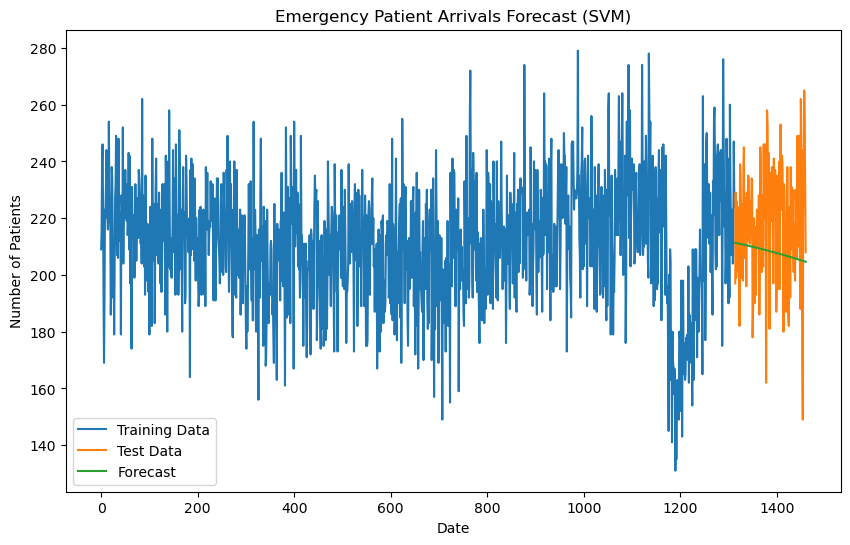

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total'], label='Training Data')
plt.plot(test.index, test['Total'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast (SVM)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [10]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [11]:
mape = mean_absolute_percentage_error(test['Total'], forecast_values)
print("MAPE:", mape)

MAPE: 8.571987987893221


In [12]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [13]:
rmse = root_mean_squared_error(test['Total'], forecast_values)
print("RMSE:", rmse)

RMSE: 22.983731677850436


In [14]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['Total'], forecast_values)
print("MAE:", mae)

MAE: 18.923687215734972
